## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import Normalizer

## Agglomerative Hierarchical Clustering

### Read File

In [19]:
data = pd.read_csv('data.csv')
numeric_data = data[['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence','popularity', 'tempo', 'liveness', 'loudness', 'speechiness', 'year']]
print(numeric_data)


        acousticness  danceability  energy  duration_ms  instrumentalness  \
0             0.9950         0.708  0.1950       158648          0.563000   
1             0.9940         0.379  0.0135       282133          0.901000   
2             0.6040         0.749  0.2200       104300          0.000000   
3             0.9950         0.781  0.1300       180760          0.887000   
4             0.9900         0.210  0.2040       687733          0.908000   
...              ...           ...     ...          ...               ...   
169904        0.1730         0.875  0.4430       163800          0.000032   
169905        0.0167         0.719  0.3850       167468          0.031300   
169906        0.5380         0.514  0.5390       180700          0.002330   
169907        0.0714         0.646  0.7610       167308          0.000000   
169908        0.1090         0.512  0.4280       214787          0.000000   

        valence  popularity    tempo  liveness  loudness  speechiness  year

### Cluster Data and Plot Dendrogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [100.0, 100.0, 132.5, 132.5],
  [40.0, 40.0, 116.25, 116.25]],
 'dcoord': [[0.0, 954279.9841012851, 954279.9841012851, 0.0],
  [0.0, 1271898.2164078734, 1271898.2164078734, 0.0],
  [954279.9841012851,
   3002929.3608690985,
   3002929.3608690985,
   1271898.2164078734],
  [0.0, 1226304.59981214, 1226304.59981214, 0.0],
  [0.0, 2057216.5995582428, 2057216.5995582428, 0.0],
  [1226304.59981214,
   3782891.9032076695,
   3782891.9032076695,
   2057216.5995582428],
  [3002929.3608690985,
   7633152.146655441,
   7633152.146655441,
   3782891.9032076695],
  [0.0, 1359213.2701183467, 1359213.2701183467, 0.0],
  [0.0, 1656747.681795032, 16

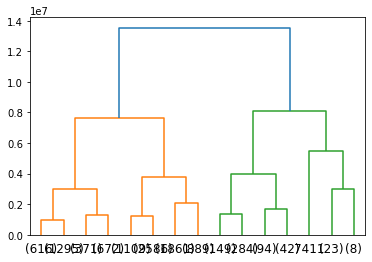

In [24]:
# clustering = linkage(numeric_data, method='ward')
# dendrogram(clustering, truncate_mode='level', p=3)

clustering = linkage(numeric_data.values[0:10000], method='ward')
dendrogram(clustering, truncate_mode='level', p=3)

### Find Correlation Between Numeric Features

          0         1         2         3         4         5         6  \
0  1.000000 -0.052444  0.028248 -0.173301 -0.192632 -0.072019 -0.851680   
1 -0.052444  1.000000  0.104673  0.430168  0.128730  0.387926 -0.239996   
2  0.028248  0.104673  1.000000 -0.241114 -0.113167  0.219609 -0.324621   
3 -0.173301  0.430168 -0.241114  1.000000  0.228954  0.087334  0.103257   
4 -0.192632  0.128730 -0.113167  0.228954  1.000000 -0.022739  0.114525   
5 -0.072019  0.387926  0.219609  0.087334 -0.022739  1.000000 -0.323961   
6 -0.851680 -0.239996 -0.324621  0.103257  0.114525 -0.323961  1.000000   
7  0.009062 -0.305617  0.021065 -0.186267 -0.015961  0.021672 -0.085550   
8  0.421812 -0.231455 -0.134664 -0.261265 -0.176540 -0.111756 -0.282468   

          7         8  
0  0.009062  0.421812  
1 -0.305617 -0.231455  
2  0.021065 -0.134664  
3 -0.186267 -0.261265  
4 -0.015961 -0.176540  
5  0.021672 -0.111756  
6 -0.085550 -0.282468  
7  1.000000 -0.012554  
8 -0.012554  1.000000  


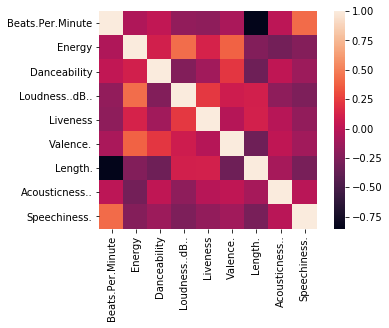

In [181]:
# datap = pd.read_csv('top50.csv')
# datap1 = datap[["Beats.Per.Minute","Energy","Danceability","Loudness..dB..","Liveness","Valence.","Length.","Acousticness..","Speechiness."]]
cor = pd.DataFrame(Normalizer().fit_transform(numeric_data)).corr(method='pearson')
labels = ["Beats.Per.Minute","Energy","Danceability","Loudness..dB..","Liveness","Valence.","Length.","Acousticness..","Speechiness."]
sns.heatmap(cor, square = True, yticklabels=labels, xticklabels=labels)
print(cor)

The highest correlation exists between Beats.Per.Minute and Length.

### Visualization of Clusters

[0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0, 0.5, 'Length')

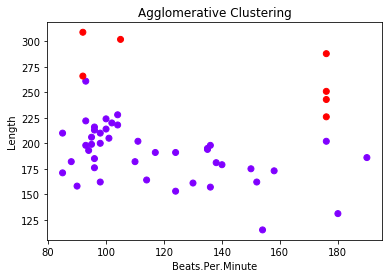

In [218]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(numeric_data)
print(clustering.labels_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(numeric_data[:,0], numeric_data[:,6], c=clustering.labels_, cmap='rainbow')
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Beats.Per.Minute')
ax.set_ylabel('Length')

Cluster  1 :
 {'dance pop': 8, 'pop': 7, 'canadian hip hop': 3, 'latin': 3, 'edm': 3, 'canadian pop': 2, 'dfw rap': 2, 'country rap': 2, 'electropop': 2, 'brostep': 2, 'trap music': 1, 'escape room': 1, 'pop house': 1, 'australian pop': 1, 'reggaeton': 1, 'atl hip hop': 1, 'big room': 1, 'boy band': 1, 'r&b en espanol': 1} 

Cluster  2 :
 {'reggaeton flow': 2, 'panamanian pop': 2, 'latin': 2, 'reggaeton': 1} 



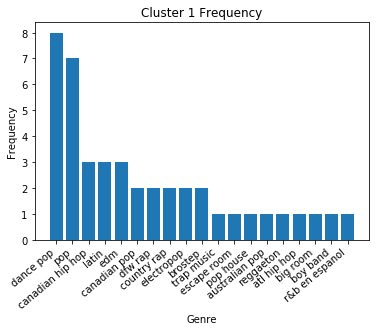

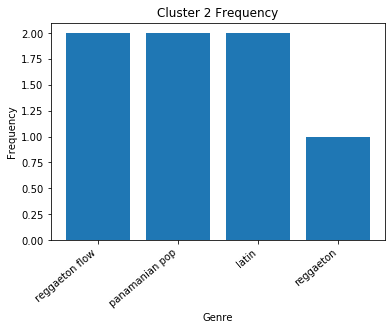

In [219]:
def word_count(words):
    counts = dict()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

for i in range(max(clustering.labels_) + 1):
    c = np.argwhere(clustering.labels_ == i)
    genres = word_count(np.squeeze(data[[c]][:,:,3]))
    genres = {k: v for k, v in sorted(genres.items(), key=lambda item: item[1], reverse=True)}
    print('Cluster ', i + 1, ':\n', genres, '\n')

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Cluster ' + str(i + 1) + ' Frequency')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Frequency')
    ax.bar(genres.keys(), genres.values())
    plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')